# Exploratory Data Analysis (EDA)

## Step 1: Import the necessary libraries

In [37]:
import pandas as pd
# For loading data as Pandas Dataframe
import numpy as np
# For performing Matrix Calculations
import seaborn as sns
# For visualizing statistical results
import scipy.stats as s
# For computing Statistical Functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#For plotting Distributions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# For evaluating the performance of the model

## Step 2: Read the dataset

In [38]:
data = pd.read_excel('fitur.xlsx')

## Step 3: Check the dataset

In [39]:
data

,Mean S1,Mean S2,Mean Sys,Mean Dys,Std S1,Std S2,Std Sys,Std Dys,F Mean S1,F Mean S2,F Mean Sys,F Mean Dys,F Std S1,F Std S2,F Std Sys,F Std Dys,0/1
0,0.053250,0.027750,0.178500,0.178500,0.001750,0.001750,0.000500,0.003500,76.092617,17.261252,74.294043,66.311416,6.057473,0.622040,16.885023,8.398290,1
1,0.058000,0.027000,0.180250,0.122500,0.005000,0.001000,0.006750,0.036000,97.577325,13.436205,79.427518,49.957391,13.475828,1.445589,21.033087,24.699884,1
2,0.045250,0.025000,0.180500,0.168250,0.007750,0.000500,0.000500,0.010750,66.784077,15.715271,76.404344,48.420747,13.911058,1.579070,18.075928,5.474815,1
3,0.044167,0.019000,0.070833,0.148167,0.023897,0.008832,0.082610,0.017618,67.363589,8.505972,35.228510,78.158365,44.776604,5.247691,45.763336,7.986506,1
4,0.069500,0.024500,0.178750,0.103250,0.017500,0.003500,0.010250,0.047750,142.857304,17.866658,119.500825,44.755049,52.181101,4.358975,16.669375,17.903582,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.017786,0.025714,0.137500,0.103000,0.011025,0.020078,0.075379,0.097531,3.925632,7.347145,24.120717,16.549188,3.257828,7.305757,15.680690,20.210793,0
96,0.042900,0.017200,0.172000,0.142900,0.022604,0.013189,0.089590,0.115553,11.219256,3.970546,29.929342,27.413173,6.834625,4.259700,16.219108,25.183788,0
97,0.018600,0.051300,0.206400,0.121300,0.010298,0.014975,0.103965,0.084482,4.253537,13.217798,32.574083,20.076641,4.373956,7.154424,21.382244,15.451226,0
98,0.025136,0.017136,0.061455,0.062318,0.022028,0.020376,0.094640,0.091344,6.345539,3.520754,9.455772,10.748373,6.915799,4.972425,15.559387,18.773614,0


In [40]:
data_columns = data.columns

In [41]:
data_columns

Index(['Mean S1', 'Mean S2', 'Mean Sys', 'Mean Dys', 'Std S1', 'Std S2',
       'Std Sys', 'Std Dys', 'F Mean S1', 'F Mean S2', 'F Mean Sys',
       'F Mean Dys', 'F Std S1', 'F Std S2', 'F Std Sys', 'F Std Dys', '0/1'],
      dtype='object')

In [42]:
len(data_columns)

17

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mean S1     100 non-null    float64
 1   Mean S2     100 non-null    float64
 2   Mean Sys    100 non-null    float64
 3   Mean Dys    100 non-null    float64
 4   Std S1      100 non-null    float64
 5   Std S2      100 non-null    float64
 6   Std Sys     100 non-null    float64
 7   Std Dys     100 non-null    float64
 8   F Mean S1   100 non-null    float64
 9   F Mean S2   100 non-null    float64
 10  F Mean Sys  100 non-null    float64
 11  F Mean Dys  100 non-null    float64
 12  F Std S1    100 non-null    float64
 13  F Std S2    100 non-null    float64
 14  F Std Sys   100 non-null    float64
 15  F Std Dys   100 non-null    float64
 16  0/1         100 non-null    int64  
dtypes: float64(16), int64(1)
memory usage: 13.4 KB


In [44]:
data_columns = list(data_columns)
#data_columns.remove('No')
data_columns


['Mean S1',
 'Mean S2',
 'Mean Sys',
 'Mean Dys',
 'Std S1',
 'Std S2',
 'Std Sys',
 'Std Dys',
 'F Mean S1',
 'F Mean S2',
 'F Mean Sys',
 'F Mean Dys',
 'F Std S1',
 'F Std S2',
 'F Std Sys',
 'F Std Dys',
 '0/1']

## Step 3: Verify appropriate features using heatmap

In [45]:
data_copy = data.replace(to_replace=['0','1'],value=[0,1],inplace=False)

In [46]:
corr_df = data.corr()
corr_df

,Mean S1,Mean S2,Mean Sys,Mean Dys,Std S1,Std S2,Std Sys,Std Dys,F Mean S1,F Mean S2,F Mean Sys,F Mean Dys,F Std S1,F Std S2,F Std Sys,F Std Dys,0/1
Mean S1,1.000000,0.104445,-0.174021,-0.158121,0.613273,0.131789,-0.060445,-0.122053,0.783801,0.098822,-0.041332,-0.104532,0.627849,0.090334,-0.007143,-0.061717,-0.000016
Mean S2,0.104445,1.000000,-0.249397,-0.152178,0.228411,0.787202,-0.056570,0.045753,0.067396,0.820025,-0.184161,-0.121449,0.164548,0.752815,-0.068382,0.003004,-0.185426
Mean Sys,-0.174021,-0.249397,1.000000,0.613487,-0.592857,-0.557507,-0.124800,-0.344404,-0.322524,-0.337749,0.540371,0.197973,-0.456868,-0.358330,-0.000423,-0.354155,0.679192
Mean Dys,-0.158121,-0.152178,0.613487,1.000000,-0.454886,-0.413549,-0.316542,-0.090062,-0.315534,-0.208408,0.208350,0.625151,-0.362200,-0.259157,-0.171052,-0.106629,0.580611
Std S1,0.613273,0.228411,-0.592857,-0.454886,1.000000,0.553356,0.297383,0.300486,0.714462,0.302786,-0.208431,-0.165296,0.871740,0.331077,0.213774,0.262224,-0.604934
Std S2,0.131789,0.787202,-0.557507,-0.413549,0.553356,1.000000,0.238367,0.309970,0.268532,0.882544,-0.241836,-0.162908,0.469372,0.897936,0.173885,0.257467,-0.555869
Std Sys,-0.060445,-0.056570,-0.124800,-0.316542,0.297383,0.238367,1.000000,0.567307,0.154073,0.060245,0.403252,0.121627,0.209066,0.089950,0.882415,0.569210,-0.658596
Std Dys,-0.122053,0.045753,-0.344404,-0.090062,0.300486,0.309970,0.567307,1.000000,0.094963,0.155462,0.099296,0.360517,0.196017,0.142500,0.549585,0.846104,-0.636013
F Mean S1,0.783801,0.067396,-0.322524,-0.315534,0.714462,0.268532,0.154073,0.094963,1.000000,0.200031,0.106296,-0.018390,0.878843,0.198178,0.210463,0.195008,-0.254404
F Mean S2,0.098822,0.820025,-0.337749,-0.208408,0.302786,0.882544,0.060245,0.155462,0.200031,1.000000,-0.117549,-0.048647,0.299611,0.976664,0.069570,0.144334,-0.283841


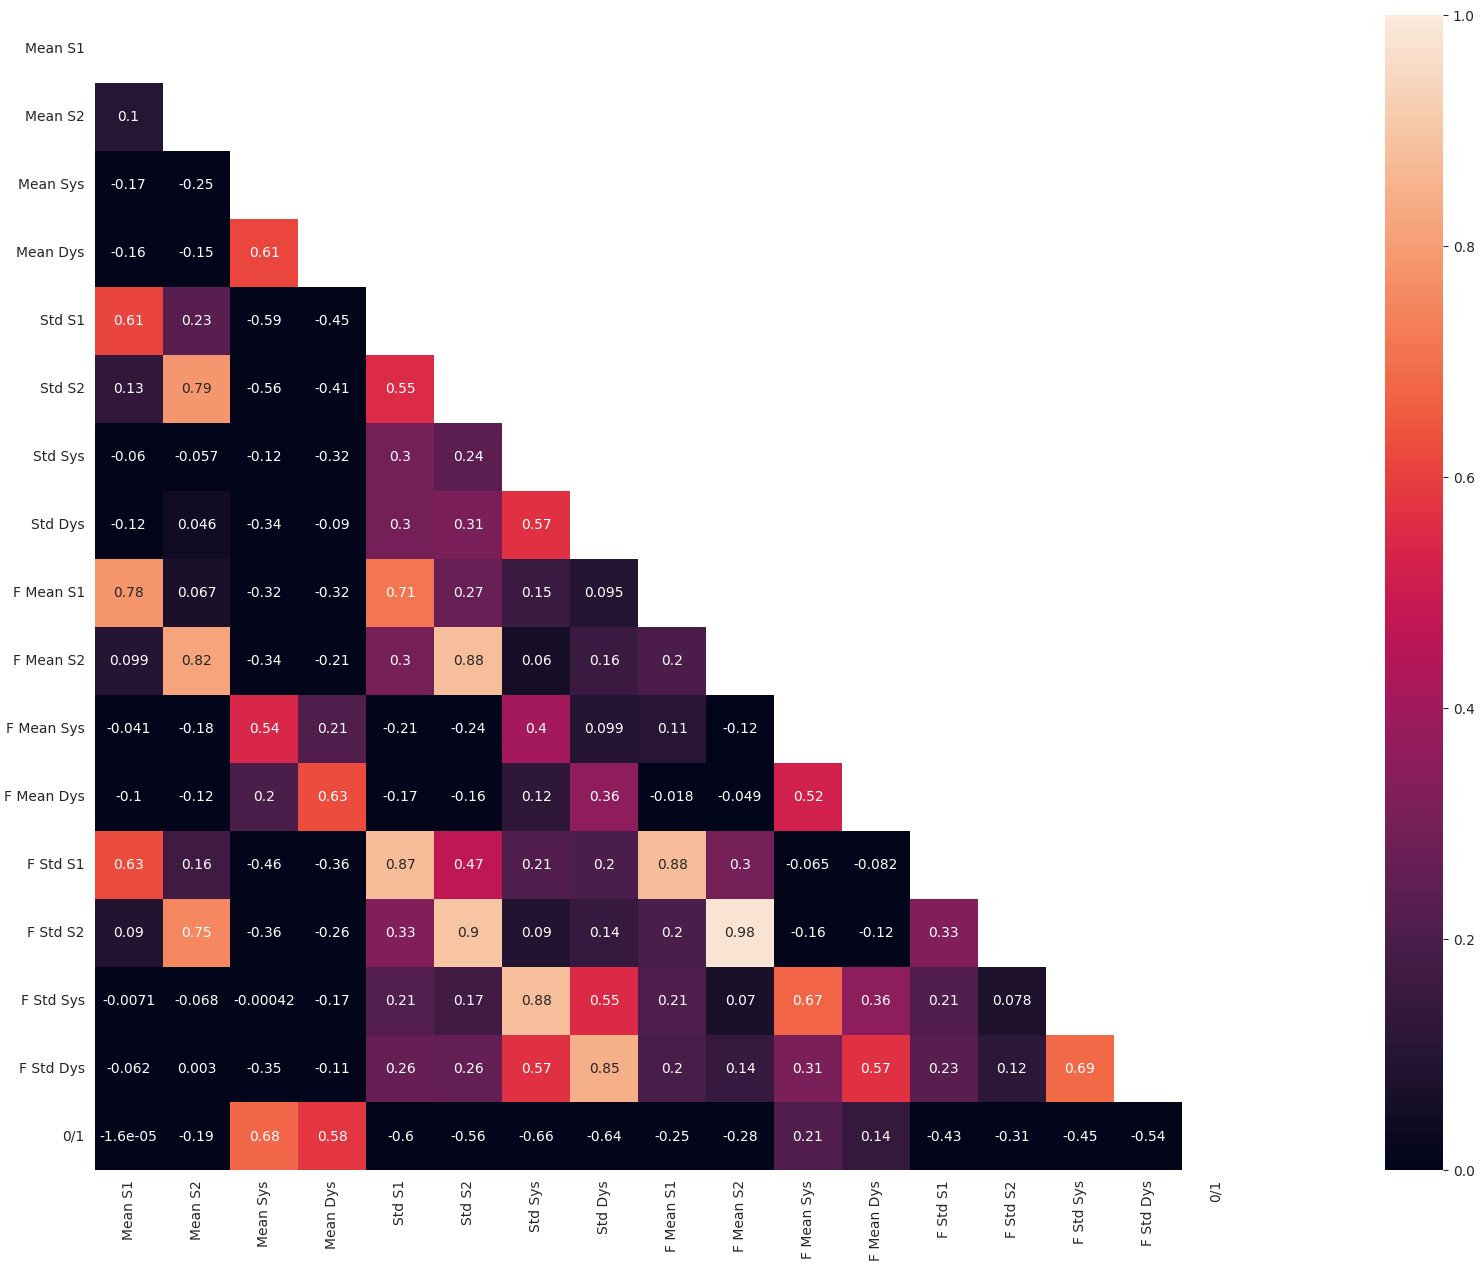

In [47]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True #True = generate a mask of lower triangle of matrix
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35,15))
    sns.heatmap(data=corr_df,vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [48]:
strong_relation_features = pd.Series(corr_df['0/1']).nlargest(n=5).iloc[1:] #nlargest(n=9)==> take 8 features

In [49]:
strong_relation_features

Mean Sys      0.679192
Mean Dys      0.580611
F Mean Sys    0.210073
F Mean Dys    0.139186
Name: 0/1, dtype: float64

In [50]:
diagnosis = data['0/1']
data_copy = data[list(strong_relation_features.to_dict().keys())]

In [51]:
data_copy["0/1"] = diagnosis

C:\Users\hp\AppData\Local\Temp\ipykernel_2708\1343147424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy["0/1"] = diagnosis


In [52]:
data_copy

,Mean Sys,Mean Dys,F Mean Sys,F Mean Dys,0/1
0,0.178500,0.178500,74.294043,66.311416,1
1,0.180250,0.122500,79.427518,49.957391,1
2,0.180500,0.168250,76.404344,48.420747,1
3,0.070833,0.148167,35.228510,78.158365,1
4,0.178750,0.103250,119.500825,44.755049,1
...,...,...,...,...,...
95,0.137500,0.103000,24.120717,16.549188,0
96,0.172000,0.142900,29.929342,27.413173,0
97,0.206400,0.121300,32.574083,20.076641,0
98,0.061455,0.062318,9.455772,10.748373,0


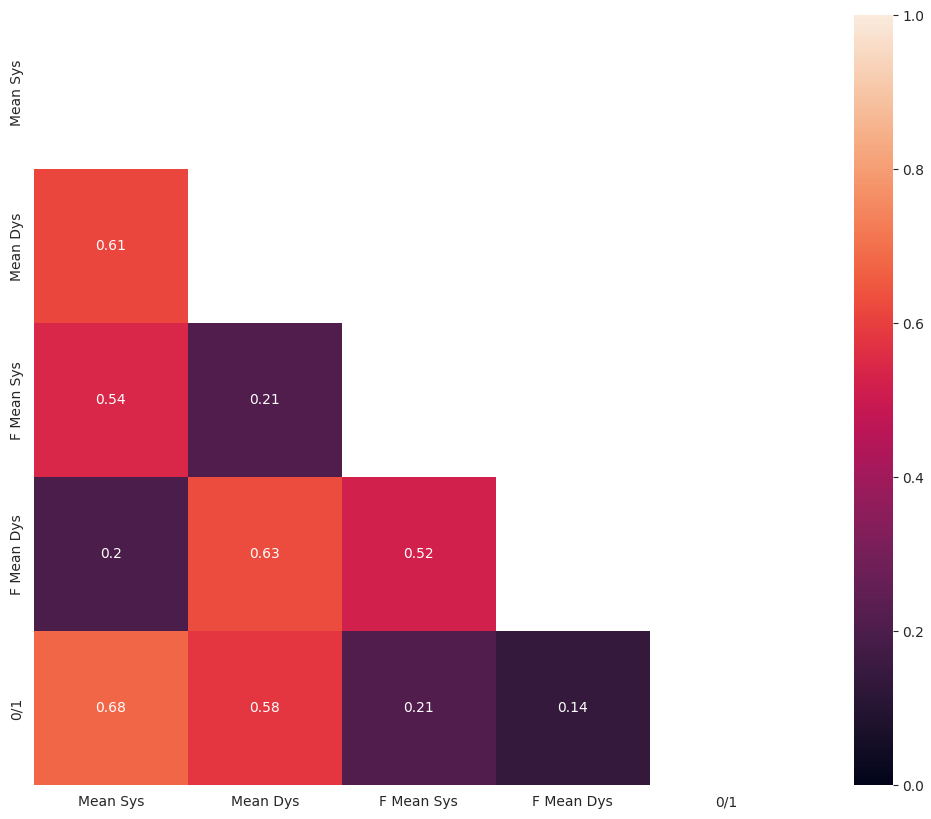

In [53]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13,10))
    sns.heatmap(data=data_copy.corr(),vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [54]:
data_copy.to_excel("9.xlsx")